In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynadojo.systems.lorenz import LorenzSystem
from dynadojo.wrappers import SystemChecker, AlgorithmChecker
from dynadojo.utils.lds import plot
from dynadojo.baselines.gru_rnn import GRU_RNN

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

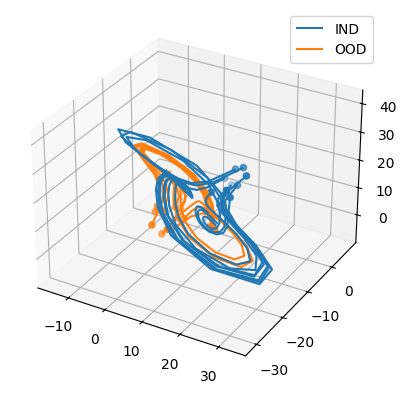

In [105]:
latent_dim = 3
embed_dim = latent_dim
n = 50
test_size = 10
timesteps = 30
system = SystemChecker(LorenzSystem(latent_dim, embed_dim, noise_scale=0, seed=1912))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)
plot([x, y], target_dim=min(latent_dim, 3), labels=["IND", "OOD"], max_lines=test_size)

Epoch 0, Validation Loss 5659.18115234375
Epoch 0, Loss 5659.18115234375
Epoch 1, Validation Loss 5636.26953125
Epoch 2, Validation Loss 5612.51318359375
Epoch 3, Validation Loss 5586.27783203125
Epoch 4, Validation Loss 5555.603515625
Epoch 5, Validation Loss 5517.67626953125
Epoch 6, Validation Loss 5468.9296875
Epoch 7, Validation Loss 5405.9697265625
Epoch 8, Validation Loss 5326.48681640625
Epoch 9, Validation Loss 5229.91162109375
Epoch 10, Validation Loss 5117.8662109375
Epoch 11, Validation Loss 4993.98779296875
Epoch 12, Validation Loss 4862.75830078125
Epoch 13, Validation Loss 4728.283203125
Epoch 14, Validation Loss 4593.5986328125
Epoch 15, Validation Loss 4460.63818359375
Epoch 16, Validation Loss 4330.5185546875
Epoch 17, Validation Loss 4203.818359375
Epoch 18, Validation Loss 4080.85986328125
Epoch 19, Validation Loss 3961.882080078125
Epoch 20, Validation Loss 3847.041015625
Epoch 21, Validation Loss 3736.3291015625
Epoch 22, Validation Loss 3629.613525390625
Epoch 23

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

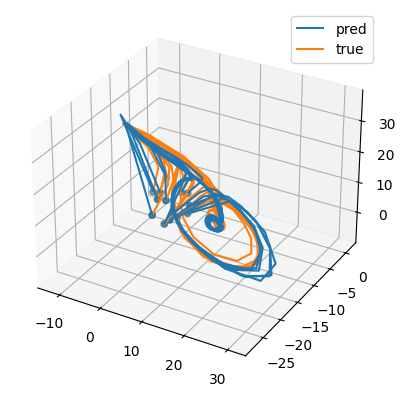

In [132]:
gru_rnn = AlgorithmChecker(GRU_RNN(embed_dim, timesteps, max_control_cost=0, lr=5e-3, seed=100))
#gru_rnn.fit(x, epochs=2000, verbose=True)
#gru_rnn.fit(x, epochs=2000, verbose=True, early_stopping=True, patience=10, min_delta=1)
y_pred = gru_rnn.predict(y[:, 0], timesteps)
y_err = system.calc_error(y, y_pred)
print(f"{y_err=}")
plot([y_pred, y], target_dim=min(3, latent_dim), labels=["pred", "true"], max_lines=15)